1. What are the features used in this dataset?  What are the classes? 

Answer: 
In this dataset we have 9 features that indicate the following.
1. RI: refractive index
2. Na: Sodium 
3. Mg: Magnesium
4. Al: Aluminum
5. Si: Silicon
6. K: Potassium
7. Ca: Calcium
8. Ba: Barium
9. Fe: Iron

And there are 7 classes which are. 

1. building_windows_float_processed
2. building_windows_non_float_processed
3. vehicle_windows_float_processed
4. vehicle_windows_non_float_processed (none in this database)
5. containers
6. tableware
7. headlamps

2. Calculate the class priors for this dataset.  Is there something unusual about the priors?

In [2]:
import numpy as np
import pandas as pd

# Import dataset of glasses
url = 'https://raw.githubusercontent.com/SamiESK/GlassDataSet/main/glass.data'
dataset = pd.read_csv(url, header = None)

#Split dataset to read desired values
x = dataset.iloc[:,10]

# Get each class and print out the class priors of the class 
class1 = 0
for i in x:
  if i == 1:
    class1 += 1
class1 = (class1/len(x))
print('Class 1:', class1)

class2 = 0
for i in x: 
  if i == 2:
    class2 += 1
class2 = (class2/len(x))
print('Class 2:', class2)

class3 = 0
for i in x: 
  if i == 3:
    class3 += 1
class3 = (class3/len(x))
print('Class 3:', class3)


class4 = 0
for i in x: 
  if i == 4:
    class4 += 1
class4 = (class4/len(x))
print('Class 4:', class4)


class5 = 0
for i in x: 
  if i == 5:
    class5 += 1
class5 = (class5/len(x))
print('Class 5:', class5)


class6 = 0
for i in x: 
  if i == 6:
    class6 += 1
class6 = (class6/len(x)) 
print('Class 6:', class6)


class7 = 0
for i in x: 
  if i == 7:
    class7 += 1
class7 = (class7/len(x))   
print('Class 7:', class7)

Class 1: 0.32710280373831774
Class 2: 0.35514018691588783
Class 3: 0.0794392523364486
Class 4: 0.0
Class 5: 0.06074766355140187
Class 6: 0.04205607476635514
Class 7: 0.13551401869158877


Answer: Other than the fact the there is no classifiers for '4'.

3. Calculate the entropy of the class prior distribution.  This can be done by calculating the entropy of each of the class priors and then summing them.



In [3]:
from math import log2

priors = np.array([class1, class2, class3, class4, class5, class6, class7])
entropy = 0
for i in range(len(priors)):
  if priors[i] == 0:
    continue
  entropy += -1 * (priors[i] * np.log(priors[i]))

print(entropy)

1.508658400223694


4. Look at the class conditional distributions of the dataset, P(X|Y).  To do this split the dataset into different classes.  Since you are working with continuous features, model them by fitting a Gaussian.  Create a dictionary data structure with the key as the class label and the values a dataframe containing 2 series (one for the mean and the other for the standard deviation). Print this out.

In [343]:
df = [dataset.iloc[0:70,1:10], dataset.iloc[70:146,1:10], dataset.iloc[146:163,1:10], 0, dataset.iloc[163:176,1:10], dataset.iloc[176:185,1:10], dataset.iloc[185:214,1:10]]

classDict = dict()

for i in range(7):
  if i == 3:
    continue
  for j in range(1,10):
    meanArr = [j]
    mean = np.mean(df[i][j])
    meanArr = [mean]
    strdArr = [j]
    strd = np.std(df[i][j])
    strdArr = [strd]
    tempdf = pd.DataFrame(np.vstack((meanArr, strdArr)), index = ["Mean", "SD"])

    
  classDict = tempdf.T
  
  for x in classDict:
    print(classDict)
    print("Class", x)
    print(classDict[x])

    Mean        SD
0  0.057  0.088436
Class Mean
0    0.057
Name: Mean, dtype: float64
    Mean        SD
0  0.057  0.088436
Class SD
0    0.088436
Name: SD, dtype: float64
       Mean       SD
0  0.079737  0.10573
Class Mean
0    0.079737
Name: Mean, dtype: float64
       Mean       SD
0  0.079737  0.10573
Class SD
0    0.10573
Name: SD, dtype: float64
       Mean        SD
0  0.057059  0.104643
Class Mean
0    0.057059
Name: Mean, dtype: float64
       Mean        SD
0  0.057059  0.104643
Class SD
0    0.104643
Name: SD, dtype: float64
       Mean        SD
0  0.060769  0.149484
Class Mean
0    0.060769
Name: Mean, dtype: float64
       Mean        SD
0  0.060769  0.149484
Class SD
0    0.149484
Name: SD, dtype: float64
   Mean   SD
0   0.0  0.0
Class Mean
0    0.0
Name: Mean, dtype: float64
   Mean   SD
0   0.0  0.0
Class SD
0    0.0
Name: SD, dtype: float64
       Mean        SD
0  0.013448  0.029276
Class Mean
0    0.013448
Name: Mean, dtype: float64
       Mean        SD
0  0.013

5. Calculate the probability density function value for observing x=0.2 from a Gaussian distribution with a mean of 0.5 and standard deviation of 0.1.

In [5]:
x = 0.5
a = 0.2
sigma = 0.1
# Gaussian distribution equation for 'g'
g = 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - a)**2 / (2 * sigma**2) )

print(g)

0.044318484119380115


6. A naive Bayes model assumes that the probability of a sample belonging to a class is proportional to the class prior*product of pdf value of the features.  Imagine doing the following 2 class classification where you are modeling the feature probabilities with Gaussians and the features are object height and width. You need to classify a new object that has a height of 0.2 m and width of 0.7m.

Class 1 prior=0.6
, Class 2 prior=0.4  

Features: height, width

Height Class 1: mean 0.5, standard deviation of 0.1, 
Height Class 2: mean 0.2, standard deviation of 0.1, 
Width Class 1 : mean 0.7, standard deviation of 1, 
Width Class 2: mean 0.3, standard deviation of .2

Assuming a naive Bayes model which class would you select for the data point?

In [36]:
from scipy.stats import norm

height =  0.2
width = 0.7

cp1 = 0.6
hmc1 = 0.5
shc1 = 0.1

cp2 = 0.4
hmc2 = 0.2
shc2 = 0.1

wmc1 = 0.7
wsc1 = 1

wmc2 = 0.3  
wsc2 = 0.2

bc1 = cp1 * norm.pdf(height, hmc1, shc1) * norm.pdf(width, wmc1, wsc1)
bc2 = cp2 * norm.pdf(height, hmc2, shc2) * norm.pdf(width, wmc2, wsc2)
print(bc1)
print(bc2)

0.01060831027111211
0.4307855860369728


Answer: I would use the second class for this data point.

2. Evaluate the performance of  scikit-learn's SVC on the Glass dataset.  To create the test train split use scikit-learn's train_test_split(X, y, test_size=0.2, random_state=8290). 

In [351]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

X = dataset.iloc[:,1:10]
y = dataset.iloc[:,10]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 8290)

3. Compare the accuracy performance of the linear vs. radial basis function kernel with C=5 and gamma=auto.  You may leave the other parameters at their default setting.

In [124]:
from sklearn.svm import SVC

clf = svm.SVC(C = 5, kernel = 'linear', gamma = 'auto')
clf.fit(X_train, y_train)
y_pred1 = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred1))

clf = svm.SVC(C = 5, kernel = 'rbf', gamma = 'auto')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("RBF:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6511627906976745
RBF: 0.7674418604651163


4. Display the confusion matrix for the RBF kernel with those parameters. This can be done using plot_confusion_matrix.

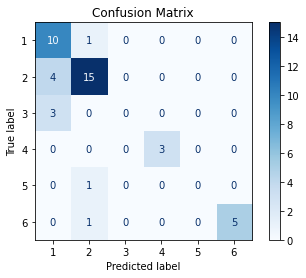

In [137]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

classNames = ['1', '2', '3', '4', '5', '6', '7']

titles_options = [("Confusion Matrix", None)]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test, display_labels = classNames, cmap = plt.cm.Blues, normalize = normalize)
    disp.ax_.set_title(title)

plt.show()

5. One of the neat things that sci-kit learn can do is search for the best performing hyperparameters using the grid search function.  However it is simple to do this for a single parameter such as C without using that function.  Iterate through the following values of C manually [0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 7, 10, 15, 20].  Report which one achieves the best accuracy.  Plot the value of C on the x axis and the value of the accuracy on y.

4


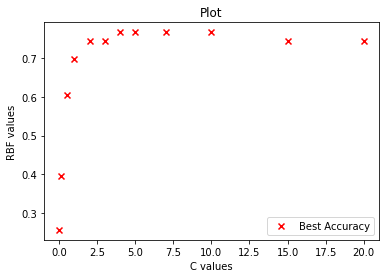

In [329]:
import matplotlib.pyplot as plt

values = [0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 7, 10, 15, 20]
bestMax = 0
px = np.zeros(len(values))
for i in range(len(values)):
  clf = svm.SVC(C = values[i], kernel = 'rbf', gamma = 'auto')
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  maxAcc = metrics.accuracy_score(y_test, y_pred)
  px[i] = maxAcc
  # Manually find the max value of maxAcc
  if maxAcc > bestMax: 
    bestMax = maxAcc
    # Find the first best index it was found in
    C = values[i]
print(C)


plt.scatter(values, px, label = "Best Accuracy", color = "red",  marker = "x") 
plt.xlabel('C values') 
# frequency label 
plt.ylabel('RBF values') 
# plot title 
plt.title('Plot') 
# showing legend 
plt.legend() 
# function to show the plot 
plt.show() 

6. Print out the support vectors that were discovered by the model.

In [339]:
print(clf.support_vectors_)

[[1.51720e+00 1.33800e+01 3.50000e+00 ... 8.43000e+00 0.00000e+00
  0.00000e+00]
 [1.51775e+00 1.28500e+01 3.48000e+00 ... 8.56000e+00 9.00000e-02
  2.20000e-01]
 [1.51736e+00 1.27800e+01 3.62000e+00 ... 8.70000e+00 0.00000e+00
  0.00000e+00]
 ...
 [1.51556e+00 1.38700e+01 0.00000e+00 ... 9.41000e+00 8.10000e-01
  1.00000e-02]
 [1.51514e+00 1.48500e+01 0.00000e+00 ... 8.39000e+00 5.60000e-01
  0.00000e+00]
 [1.52315e+00 1.34400e+01 3.34000e+00 ... 8.83000e+00 0.00000e+00
  0.00000e+00]]


7. There are other things that can be done to improve the performance of the model.   To get some ideas refer to the SVC documentation.  For instance, the data could be rescaled, the examples could be reweighted, other kernels could be tested, or a more comprehensive grid search performed.  Select an improvement and write a couple of sentences describing what you are attempting to do, test it, and report on the results.

In [350]:
X = dataset.iloc[:,1:10]
y = dataset.iloc[:,10]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 8290)

clf = svm.SVC(C = 7, kernel = 'linear', gamma = 'auto')
clf.fit(X_train, y_train)
y_pred1 = clf.predict(X_test)
print("Linear accuracy of auto:", metrics.accuracy_score(y_test, y_pred1))

clf = svm.SVC(C = 7, kernel = 'linear', gamma = 'scale')
clf.fit(X_train, y_train)
y_pred1 = clf.predict(X_test)
print("Linear Accuracy of scale:", metrics.accuracy_score(y_test, y_pred1))

clf = svm.SVC(C = 400, kernel = 'poly', gamma = 'auto')
clf.fit(X_train, y_train)
y_pred1 = clf.predict(X_test)
print("Poly accuracy of auto:", metrics.accuracy_score(y_test, y_pred1))

clf = svm.SVC(C = 400, kernel = 'poly', gamma = 'scale')
clf.fit(X_train, y_train)
y_pred1 = clf.predict(X_test)
print("Poly accuracy of scale:", metrics.accuracy_score(y_test, y_pred1))

clf = svm.SVC(C = 400, kernel = 'rbf', gamma = 'auto')
clf.fit(X_train, y_train)
y_pred1 = clf.predict(X_test)
print("RBF accuracy of auto:", metrics.accuracy_score(y_test, y_pred1))

clf = svm.SVC(C = 400, kernel = 'rbf', gamma = 'scale')
clf.fit(X_train, y_train)
y_pred1 = clf.predict(X_test)
print("RBF accuracy of scale:", metrics.accuracy_score(y_test, y_pred1))

clf = svm.SVC(C = 400, kernel = 'sigmoid', gamma = 'auto')
clf.fit(X_train, y_train)
y_pred1 = clf.predict(X_test)
print("Sigmoid accuracy of auto:", metrics.accuracy_score(y_test, y_pred1))

clf = svm.SVC(C = 400, kernel = 'sigmoid', gamma = 'scale')
clf.fit(X_train, y_train)
y_pred1 = clf.predict(X_test)
print("Sigmoid accuracy of scale:", metrics.accuracy_score(y_test, y_pred1))


Linear accuracy of auto: 0.6511627906976745
Linear Accuracy of scale: 0.6511627906976745
Poly accuracy of auto: 0.5813953488372093
Poly accuracy of scale: 0.6511627906976745
RBF accuracy of auto: 0.7209302325581395
RBF accuracy of scale: 0.6744186046511628
Sigmoid accuracy of auto: 0.2558139534883721
Sigmoid accuracy of scale: 0.4883720930232558


Answer: I first decided to compute values of different Kernel method. 
First was Linear of both auto and scale which yeilded no difference.
Second, I used Poly method of one being auto and the other was scale. Scale gave a much lower result of auto.
Third, I used RBF method where the auto gave the best result of the probability while scale was lower by 10%
Finally, I used the Sigmoid method where both auto and scale gave the lowest results. 